# Student Performance Indicator

### life cycle of machine learning project
- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Data pre-processing
- Model training
- Choose the best model

## 1. Problem satatement
- This is to understand how students performance (test scores) is affected by other variables susch as gender, ethnicity, parental level of education, Lunch and test Preparation course

## 2. Data collection
- Data source- https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 import Required data and Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

### Import csv


In [3]:
df = pd.read_csv("data/stud.csv")
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Shape of the DataSet


In [4]:
df.shape

(1000, 8)

## 2.2 Data set information

- Gender: Male/Female
- Race/Ethnicity: Group A,B,C,D
- Parental level of Education: bachelor degree, some college,masters degree, associate degree, high school.
- Lunch: Having lunch befor test; standard, Free/reduced
- Test preparation Course; complete or not complete
- Math score
- Reading score 
- Writing score

## 3. Data checks to perform

- Missing value
- Duplicates
- Data type
- Number of Unique values at each column
- Statistics of the Data
- Various categories Present in diffrent categorical columns

## 3.1 Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## 3.2 Duplicates

In [6]:
df.duplicated().sum()

0

## 3.3 Data type

In [7]:
#df.dtypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Number of Unique Values at each column

In [8]:
total_unique_value=df.nunique().sum()
unique_value_at_column = df.nunique()
print(f'total unique value in all column:{total_unique_value}'+"\n\n\n")

print(tabulate(pd.DataFrame(unique_value_at_column), headers= ["columns", "Number of unique values"], tablefmt= "outline"))


total unique value in all column:247



+-----------------------------+---------------------------+
| columns                     |   Number of unique values |
+=============================+===========================+
| gender                      |                         2 |
| race_ethnicity              |                         5 |
| parental_level_of_education |                         6 |
| lunch                       |                         2 |
| test_preparation_course     |                         2 |
| math_score                  |                        81 |
| reading_score               |                        72 |
| writing_score               |                        77 |
+-----------------------------+---------------------------+


## 3.5 Statistics of the dataset


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

- Total number of data is 1000 in reading,math score, writing score
- Mean score is close to each other for math_score: 66.08, reading score: 69.15, writing score: 68.05
- Min score for all the numerical data is math_score: 0, reading score: 17, writing score: 10
- standard deviation are close to each other math_score: 15.16, reading score: 14.60, writing score:≈ 15.196

## 3.6 Exploring Data 

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:

data = {
    'Variable': ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'],
    'Categories': [
        ', '.join(df['gender'].unique()),
        ', '.join(df['race_ethnicity'].unique()),
        ', '.join(df['parental_level_of_education'].unique()),
        ', '.join(df['lunch'].unique()),
        ', '.join(df['test_preparation_course'].unique())
    ]
}


df_categories = pd.DataFrame(data)

print(tabulate(df_categories, headers='keys', tablefmt="outline"))



+----+-----------------------------+-----------------------------------------------------------------------------------------------------+
|    | Variable                    | Categories                                                                                          |
+====+=============================+=====================================================================================================+
|  0 | gender                      | female, male                                                                                        |
|  1 | race_ethnicity              | group B, group C, group A, group D, group E                                                         |
|  2 | parental_level_of_education | bachelor's degree, some college, master's degree, associate's degree, high school, some high school |
|  3 | lunch                       | standard, free/reduced                                                                              |
|  4 | test_preparation_cou

### Define Numerical And Categorical Columns


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O'] 

categorical_features =[feature for feature in df.columns if df[feature].dtype == 'O']

print(tabulate([
    ['Numerical Features', len(numeric_features), numeric_features],
    ['Categorical Features', len(categorical_features), categorical_features]
], headers=['Feature Type', 'Count', 'Features'], tablefmt= "outline"))


print()

+----------------------+---------+-------------------------------------------------------------------------------------------------+
| Feature Type         |   Count | Features                                                                                        |
+======================+=========+=================================================================================================+
| Numerical Features   |       3 | ['math_score', 'reading_score', 'writing_score']                                                |
| Categorical Features |       5 | ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] |
+----------------------+---------+-------------------------------------------------------------------------------------------------+



### 3.8 Adding columns for total score and average score



In [13]:
df["total score"]= df["math_score"] + df["reading_score"] + df["writing_score"]
df["average score"]= df["total score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:

reading_full= len([reading for reading in df['reading_score'] if reading == 100])
writing_full= len([writing for writing in df['writing_score'] if writing == 100])
math_full= len([math for math in df['math_score'] if math == 100])

print(tabulate([{"Number of students with full marks in reading": reading_full,
                 "Number of student with full marks in maths": math_full,
                 "Number of student with full marks in writing":writing_full}], headers="keys", tablefmt="outline" ))



+-------------------------------------------------+----------------------------------------------+------------------------------------------------+
|   Number of students with full marks in reading |   Number of student with full marks in maths |   Number of student with full marks in writing |
+=================================================+==============================================+================================================+
|                                              17 |                                            7 |                                             14 |
+-------------------------------------------------+----------------------------------------------+------------------------------------------------+


In [15]:
reading_less_20 = len([reading for reading in df["reading_score"] if reading <= 20])
math_less_20 = len([math for math in df["math_score"] if math <= 20])
writing_less_20 = len([writing for writing in df["writing_score"] if writing <= 20])

print(tabulate([{"Number of student with less than 20 marks in reading": reading_less_20,
                 "Number of student with less than 20 marks in math": math_less_20,
                 "Number of student with less than 20 marks in writing": writing_less_20}],headers="keys", tablefmt="outline"))

+--------------------------------------------------------+-----------------------------------------------------+--------------------------------------------------------+
|   Number of student with less than 20 marks in reading |   Number of student with less than 20 marks in math |   Number of student with less than 20 marks in writing |
+========================================================+=====================================================+========================================================+
|                                                      1 |                                                   4 |                                                      3 |
+--------------------------------------------------------+-----------------------------------------------------+--------------------------------------------------------+


### Insight
- From the above values we get best and worst performance in all Maths, Writing and Reading
- Best performance are from Reading
- Worst performance are from Maths

## 4.0 Exploratory Data Visualization

### 4.1 Visualize average score distribution
- Histogram 
- Kernel Density Estimate (KDE)

### 4.1.1 Histogram & KDE

### Average score distribution by gender

<Axes: xlabel='average score', ylabel='Count'>

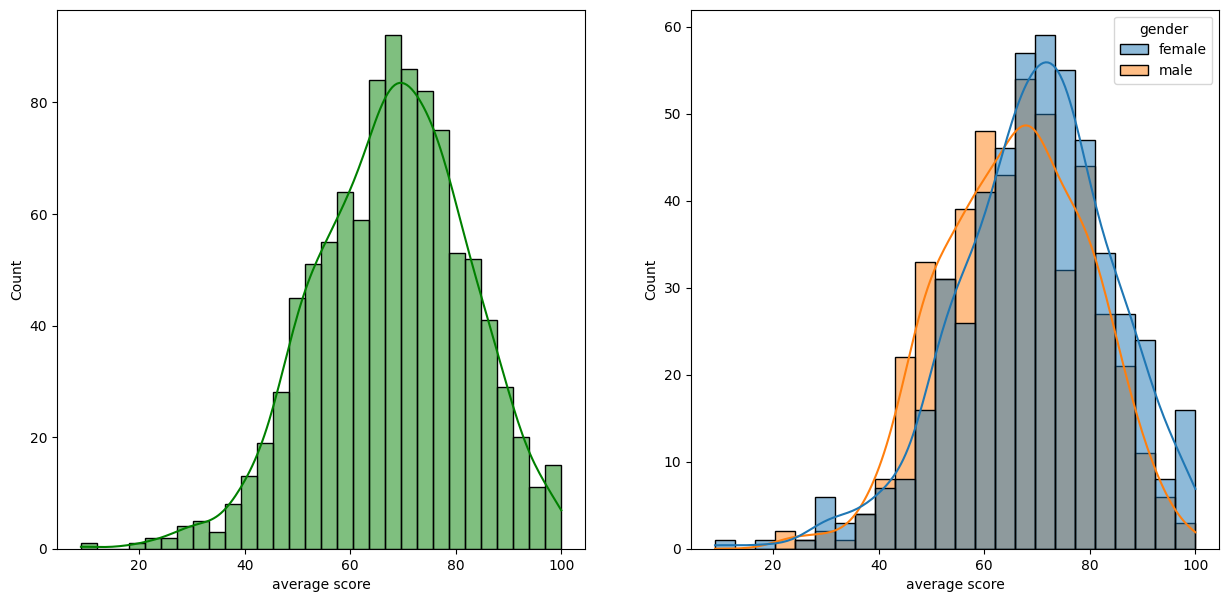

In [16]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='average score', bins=30, kde=True, color="g")

plt.subplot(122)
sns.histplot(data=df, x="average score", hue= "gender", kde=True)

### total score distribution by gender


<Axes: xlabel='total score', ylabel='Count'>

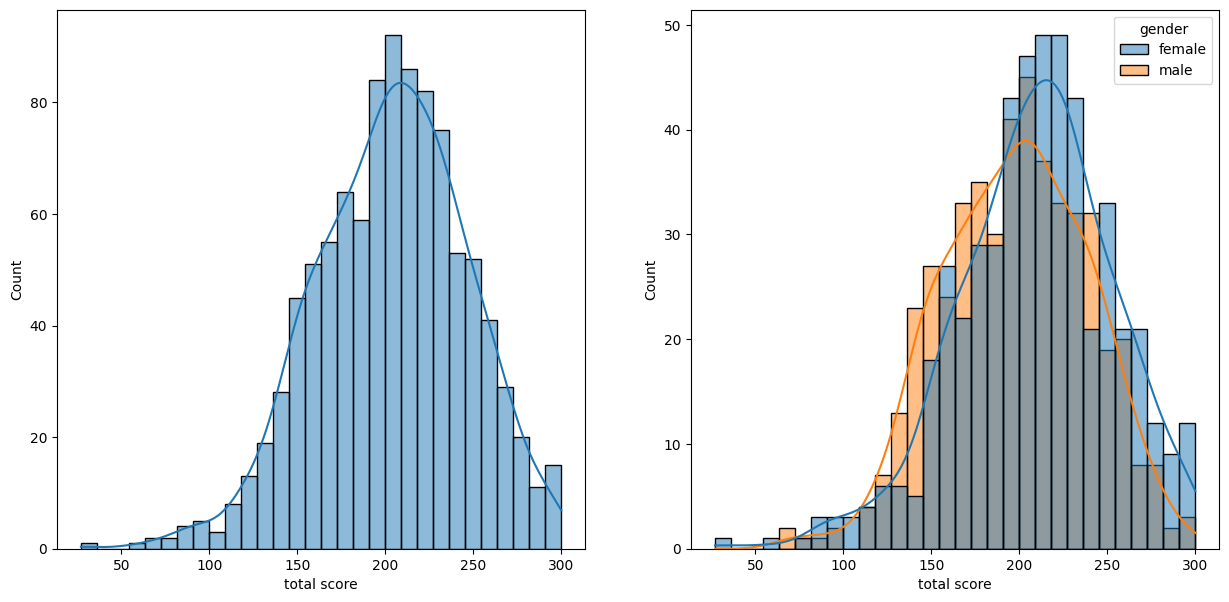

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x= "total score", kde= True, bins=30)

plt.subplot(122)
sns.histplot(data=df, x= "total score", hue="gender", bins=30, kde=True)

### Insight 
- female students tend to perform better than male students.

### performance based on lunch

<Axes: xlabel='average score', ylabel='Count'>

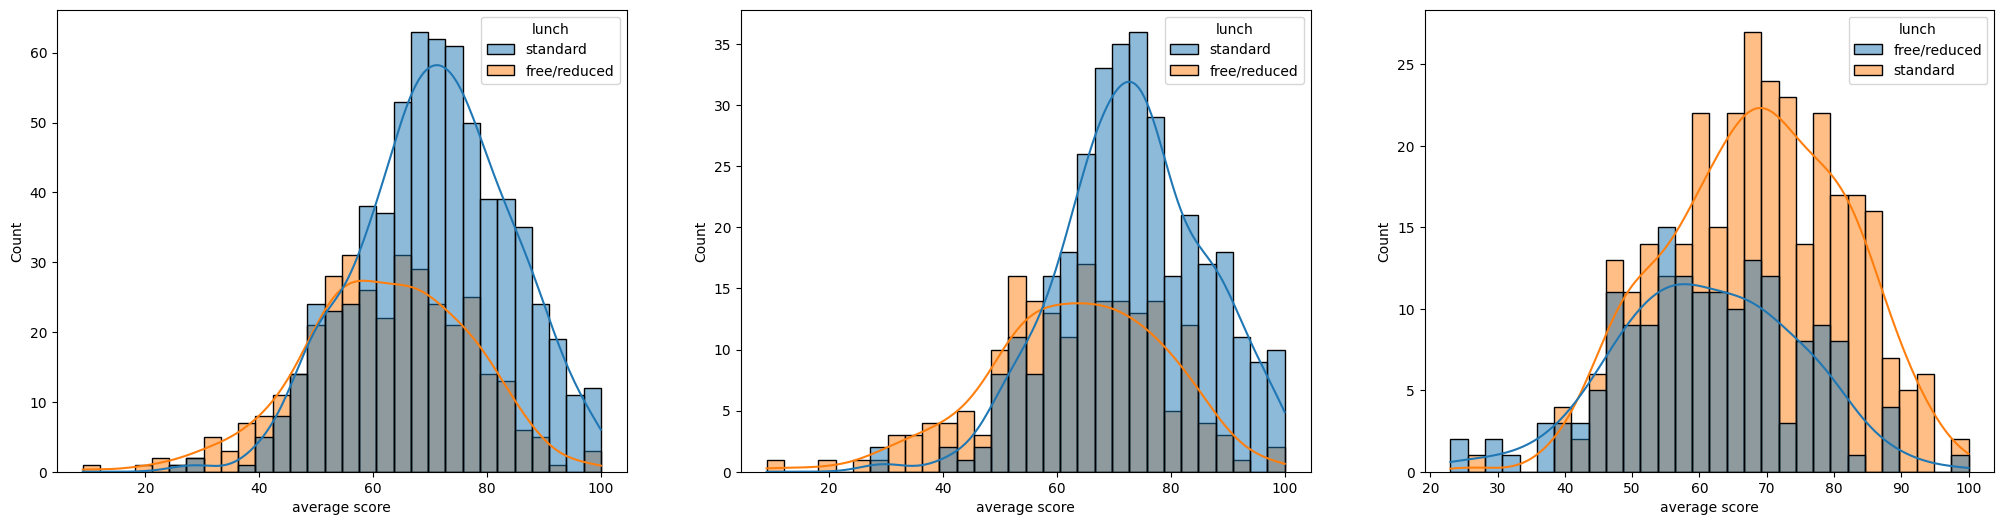

In [18]:
fig, axs =plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x= "average score",kde=True, hue="lunch", bins=30)

plt.subplot(132)
sns.histplot(data= df[df["gender"]== "female"], x="average score", hue="lunch", kde= True,bins=30)

plt.subplot(133)
sns.histplot(data= df[df["gender"]== "male"], x="average score", hue="lunch", kde= True,bins=30)

### Insight 
- Student with standard lunch performs better in exams 
- Male of female standard lunch makes them perform better

### Performance based on Parental level of education


In [20]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


<Axes: xlabel='average score', ylabel='parental_level_of_education'>

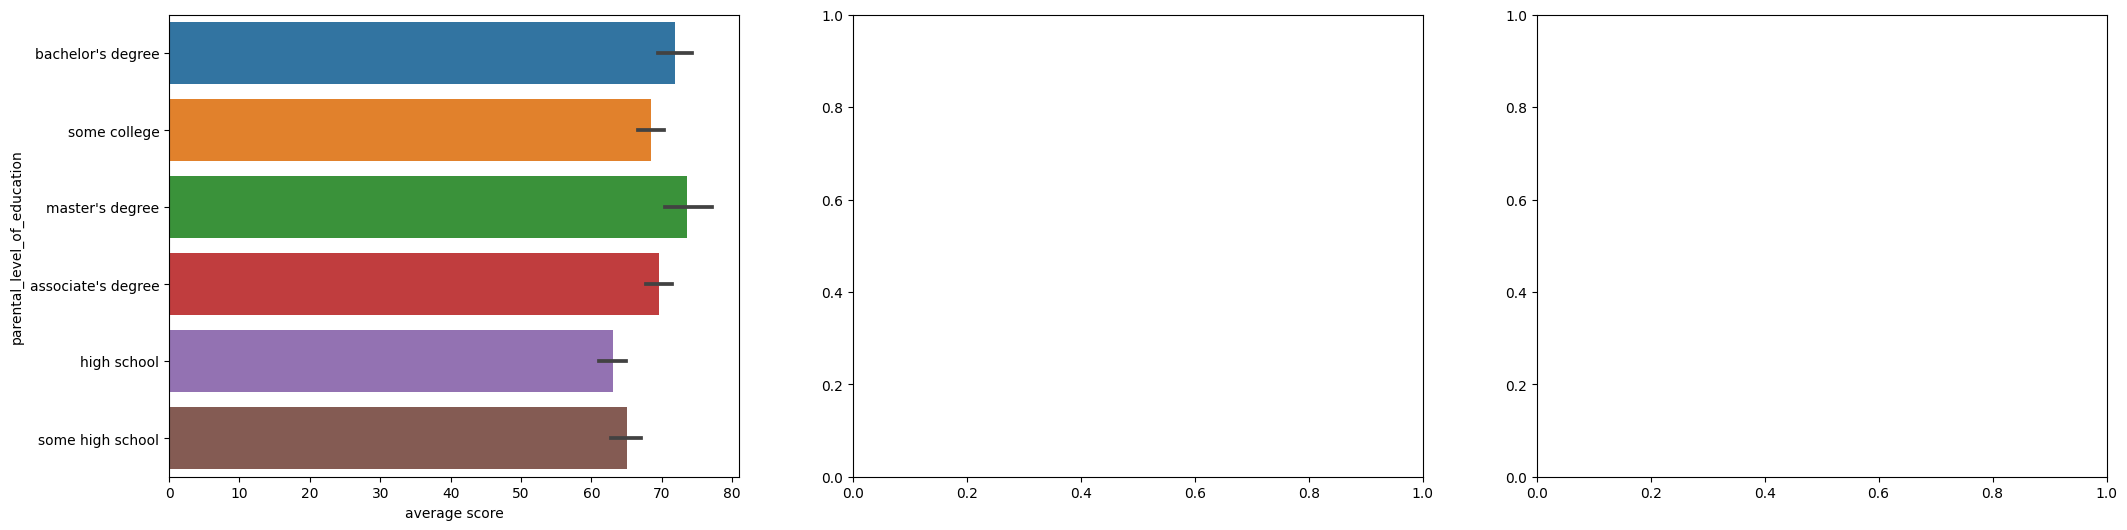

In [21]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.barplot(data=df, x="average score", y="parental_level_of_education" )